In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from skimage import data
from skimage.color import rgb2gray
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
import pandas as pd
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop

In [2]:
# Caricamento del Dataset
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Divisione con insieme di validazione formato dal % del train
percentuale = 0.1
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=percentuale, random_state=1)

In [4]:
# Normalizzazione in 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

In [5]:
######################################################################################
###################### -- PANDAS DF -- ###############################################
######################################################################################

# Riduzione di dimensionalità x train
##  print(" - Creazione Df x train - ")

# -1 -> numero righe finali impostato in automatico
# 3072 -> numero colonne che deriva da 32*32*3
# - in questo modo ogni riga corrisponde a un'immagine e ogni colonna il valore di un pixel in un'unico canale colore
x_train_flat = x_train.reshape(-1,3072)

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
# - utile in seguito in modo da assegnare nome a colonne del Data Frame Pandas
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

# Creazione del dataframe pandas
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

##  print("Shape di df_cifar : ")
##  print(df_cifar.shape)
##  print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar['label'] = y_train

##  print("Shape del df_cifar dopo aggiunta etichette : ")
##  print(df_cifar.shape)

In [6]:
################################################################################

# Riduzione di dimensionalità x val
##  print("Creazione Df x val")
x_val_flat = x_val.reshape(-1,3072)

# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
feat_cols_val = ['pixel'+str(i) for i in range(x_val_flat.shape[1])]

##  print("")

# Creazione del dataframe
df_cifar_val = pd.DataFrame(x_val_flat,columns=feat_cols_val)
##  print("Shape del df_cifar_val : ")
##  print(df_cifar_val.shape)

##  print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar_val['label'] = y_val
##  print("Shape del df_cifar_val con etichette : ")
##  print(df_cifar_val.shape)

In [7]:
# Riduzione di dimensionalità x test
##  print("Creazione Df x test")

x_test_flat = x_test.reshape(-1,3072)


# Creazione di una lista di nomi di pixel dal primo all'ultimo che compone un'immagine
feat_cols_test = ['pixel'+str(i) for i in range(x_test_flat.shape[1])]

##  print("")

# Creazione del dataframe
df_cifar_test = pd.DataFrame(x_test_flat,columns=feat_cols_test)
##  print("Shape di df_cifar_test : ")
##  print(df_cifar_test.shape)

##  print("")

# Assegnazione delle etichette ai valori nel dataframe
df_cifar_test['label'] = y_test
##  print("Shape del df_cifar_test con etichette : ")
##  print(df_cifar_test.shape)

In [8]:
################################################################################

# Utilizzo di PCA su TRAIN

# n_components è il numero di componenti che vogliamo valutare come obiettivo
pca_train = PCA(0.9)

# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar = pca_train.fit_transform(df_cifar.iloc[:,:-1])

print("\n Numero caratteristiche individuate : ",pca_train.n_components_)


################################################################################

# Utilizzo di PCA su TEST

pca_test = PCA(n_components=pca_train.n_components_)


# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar_test = pca_test.fit_transform(df_cifar_test.iloc[:,:-1])

################################################################################

# Utilizzo di PCA su VAL

pca_val = PCA(n_components=pca_train.n_components_)


# Estrazione di tutti i dati tranne ultima colonna che contiene le etichette
# - principalComponents_cifar è il risultato della riduzione di dimensionalità
principalComponents_cifar_val = pca_val.fit_transform(df_cifar_val.iloc[:,:-1])


 Numero caratteristiche individuate :  99


In [9]:
################################################################################

##  print("Assegnazione nome colonne a DF ottenuto x TRAIN")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
pca_cifar_Df = pd.DataFrame(data = principalComponents_cifar)

##  print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
##  print("Creazione dataframe con etichette come ultima colonna")
pca_cifar_Df_con_etichette = pca_cifar_Df.copy()
pca_cifar_Df_con_etichette['y'] = y_train

##  print("")

# - STAMPE DI SERVIZIO - # 
# Stampa del nuovo DF
#print("Shape del DF risultato :")
#print(principal_cifar_Df.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df : ")
#principal_cifar_Df.head()

#print("Shape del DF_etichettato risultato :")
#print(principal_cifar_Df_con_etichette.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df_etichettato : ")
#principal_cifar_Df_con_etichette.head()

In [10]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x TEST")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
pca_cifar_Df_test = pd.DataFrame(data = principalComponents_cifar_test)

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna x test")
pca_cifar_Df_con_etichette_test = pca_cifar_Df_test.copy()
pca_cifar_Df_con_etichette_test['y'] = y_test

# - STAMPE DI SERVIZIO - # 
# Stampa del nuovo DF_test
#print("Shape del DF risultato :")
#print(principal_cifar_Df_test.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df : ")
#principal_cifar_Df_test.head()

# Stampa del nuovo DF
#print("Shape del Df ottenuto x test :")
#print(principal_cifar_Df_con_etichette_test.shape)

#print("")

# Stampa delle prime righe del DF
#principal_cifar_Df_con_etichette_test.head()

Assegnazione nome colonne a DF ottenuto x TEST

Creazione dataframe con etichette come ultima colonna x test


In [11]:
################################################################################

print("Assegnazione nome colonne a DF ottenuto x val")

# DF = Data Frame

# Creazione di nuovo data frame
# - partendo da quello appena ottenuto
# - vengono aggiunti i nomi dei valori contenuti
pca_cifar_Df_val = pd.DataFrame(data = principalComponents_cifar_val)

print("")

# Aggiunta della colonna con le etichette dei dati relativi
# - Lo faccio in una copia del dataframe così da averne uno senza etichette
print("Creazione dataframe con etichette come ultima colonna x val")
pca_cifar_Df_con_etichette_val = pca_cifar_Df_val.copy()
pca_cifar_Df_con_etichette_val['y'] = y_val

# - STAMPE DI SERVIZIO - #
# Stampa del nuovo DF_val
#print("Shape del DF risultato :")
#print(principal_cifar_Df_val.shape)

#print("")

# Stampa delle prime righe del DF
#print("Head di principal_cifar_Df : ")
#principal_cifar_Df_val.head()

# Stampa del nuovo DF
#print("Shape del Df ottenuto x val :")
#print(principal_cifar_Df_con_etichette_val.shape)

#print("")

# Stampa delle prime righe del DF
#principal_cifar_Df_con_etichette_val.head()

Assegnazione nome colonne a DF ottenuto x val

Creazione dataframe con etichette come ultima colonna x val


In [12]:
# - Preparazione dei dataset filtrati

# Prova di divisione in due classi
primaEtichetta = 4
secondaEtichetta = 9

df_filtrato_etichettato = pca_cifar_Df_con_etichette[pca_cifar_Df_con_etichette['y'].isin([primaEtichetta,secondaEtichetta])]
df_filtrato_etichettato_test = pca_cifar_Df_con_etichette_test[pca_cifar_Df_con_etichette_test['y'].isin([primaEtichetta,secondaEtichetta])]
df_filtrato_etichettato_val = pca_cifar_Df_con_etichette_val[pca_cifar_Df_con_etichette_val['y'].isin([primaEtichetta,secondaEtichetta])]

# Filtro i dati delle etichette
y_train_filtrato = y_train[np.isin(y_train, [primaEtichetta,secondaEtichetta])]
y_test_filtrato = y_test[np.isin(y_test, [primaEtichetta,secondaEtichetta])]
y_val_filtrato = y_val[np.isin(y_val, [primaEtichetta,secondaEtichetta])]

# Eliminazione colonna etichette
df_filtrato = df_filtrato_etichettato.copy()
df_filtrato = df_filtrato.drop(columns=['y'])

# Eliminazione colonna etichette
df_filtrato_test = df_filtrato_etichettato_test.copy()
df_filtrato_test = df_filtrato_test.drop(columns=['y'])

# Eliminazione colonna etichette
df_filtrato_val = df_filtrato_etichettato_val.copy()
df_filtrato_val = df_filtrato_val.drop(columns=['y'])

In [22]:
# CLASSIFICAZIONE con Random Forest su set filtrato
# -> Parametri migliori

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator=SVC(), n_estimators=4, max_samples=30, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=0, verbose=0)
##  clf = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)

clf.fit(df_filtrato, y_train_filtrato)

print("Score BAGGING : " , clf.score(df_filtrato_test,y_test_filtrato))

Score BAGGING :  0.8155


In [ ]:
##########################################################################################################################################


Test Score Bagging  10  :  0.582
Train Score Bagging  10  :  0.6091517857142857

Test Score Bagging  20  :  0.759
Train Score Bagging  20  :  0.7753348214285715

Test Score Bagging  30  :  0.8155
Train Score Bagging  30  :  0.8227678571428572

Test Score Bagging  40  :  0.823
Train Score Bagging  40  :  0.8303571428571429

Test Score Bagging  50  :  0.8245
Train Score Bagging  50  :  0.8370535714285714

Test Score Bagging  60  :  0.8295
Train Score Bagging  60  :  0.8416294642857143

Test Score Bagging  70  :  0.8305
Train Score Bagging  70  :  0.8377232142857143

Test Score Bagging  80  :  0.8315
Train Score Bagging  80  :  0.8380580357142857

Test Score Bagging  90  :  0.829
Train Score Bagging  90  :  0.8426339285714286

Test Score Bagging  100  :  0.824
Train Score Bagging  100  :  0.8459821428571429
[0.582, 0.759, 0.8155, 0.823, 0.8245, 0.8295, 0.8305, 0.8315, 0.829, 0.824]


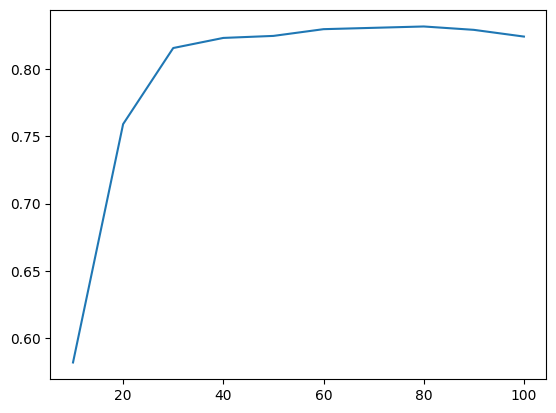

In [21]:
# CLASSIFICAZIONE con Random Forest su set filtrato

prove = [10,20,30,40,50,60,70,80,90,100]

risultatiTest = []
risultatiTrain = []

c=0
for i in prove:
    clf = BaggingClassifier(estimator=SVC(), n_estimators=4, max_samples=i, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, random_state=0, verbose=0)
    clf.fit(df_filtrato, y_train_filtrato)
    risultatiTest.append(clf.score(df_filtrato_test, y_test_filtrato))
    risultatiTrain.append(clf.score(df_filtrato, y_train_filtrato))
    print("\nTest Score Bagging ",i," : " , risultatiTest[c])
    print("Train Score Bagging ",i," : " , risultatiTrain[c])
    c = c+1

print(risultatiTest)
plt.plot(prove,risultatiTest)
plt.show()